Name - Hemant Modi

Reg. No. - 21BCE0306

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="darkgrid", color_codes=True)

Importing Data

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/HemantModi11/EDA_21BCE0306/refs/heads/main/Liver%20Data.csv')
data.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


Getting Basic information about our dataset

In [3]:
# Check the shape of the dataset (rows, columns)
print("Dataset Shape:", data.shape)

Dataset Shape: (30691, 11)


In [4]:
# Display basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30691 entries, 0 to 30690
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Age of the patient                    30689 non-null  float64
 1   Gender of the patient                 29789 non-null  object 
 2   Total Bilirubin                       30043 non-null  float64
 3   Direct Bilirubin                      30130 non-null  float64
 4   Alkphos Alkaline Phosphotase          29895 non-null  float64
 5   Sgpt Alamine Aminotransferase         30153 non-null  float64
 6   Sgot Aspartate Aminotransferase       30229 non-null  float64
 7   Total Protiens                        30228 non-null  float64
 8   ALB Albumin                           30197 non-null  float64
 9   A/G Ratio Albumin and Globulin Ratio  30132 non-null  float64
 10  Result                                30691 non-null  int64  
dtypes: float64(9), 

In [5]:
# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())


Missing Values:
 Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
Alkphos Alkaline Phosphotase            796
Sgpt Alamine Aminotransferase           538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
ALB Albumin                             494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64


In [6]:
# Get a statistical summary of numerical columns
print("\nStatistical Summary:\n", data.describe())


Statistical Summary:
        Age of the patient  Total Bilirubin  Direct Bilirubin  \
count        30689.000000     30043.000000      30130.000000   
mean            44.107205         3.370319          1.528042   
std             15.981043         6.255522          2.869592   
min              4.000000         0.400000          0.100000   
25%             32.000000         0.800000          0.200000   
50%             45.000000         1.000000          0.300000   
75%             55.000000         2.700000          1.300000   
max             90.000000        75.000000         19.700000   

       Alkphos Alkaline Phosphotase  Sgpt Alamine Aminotransferase  \
count                  29895.000000                   30153.000000   
mean                     289.075364                      81.488641   
std                      238.537589                     182.158850   
min                       63.000000                      10.000000   
25%                      175.000000               

In [7]:
# Check unique values in categorical columns
print("\nUnique values in 'Gender of the patient':", data['Gender of the patient'].unique())
print("\nUnique values in 'Result':", data['Result'].unique())


Unique values in 'Gender of the patient': ['Female' 'Male' nan]

Unique values in 'Result': [1 2]


Performing Data Transformation

In [8]:
# 1. Check for duplicates
duplicates = data.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 11323


In [9]:
# If there are duplicates, remove them
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates removed. New shape:", data.shape)

Duplicates removed. New shape: (19368, 11)


In [10]:
# 2. Handling missing values
# Check the percentage of missing values in each column
missing_percentage = (data.isnull().sum() / len(data)) * 100
print("\nMissing Values Percentage:\n", missing_percentage)


Missing Values Percentage:
 Age of the patient                      0.005163
Gender of the patient                   4.109872
Total Bilirubin                         2.875878
Direct Bilirubin                        2.529946
Alkphos Alkaline Phosphotase            3.583230
Sgpt Alamine Aminotransferase           2.369888
Sgot Aspartate Aminotransferase         2.029120
Total Protiens                          1.910368
ALB Albumin                             2.132383
A/G Ratio Albumin and Globulin Ratio    2.251136
Result                                  0.000000
dtype: float64


In [11]:
# Filling missing values (based on data type)
# For numerical columns, we can fill missing values with the median or mean
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].median())

# For categorical columns, we can fill missing values with the most frequent value (mode)
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].fillna(data[categorical_columns].mode().iloc[0])

In [12]:
# Confirm that missing values are handled
print("\nMissing Values After Handling:\n", data.isnull().sum())


Missing Values After Handling:
 Age of the patient                      0
Gender of the patient                   0
Total Bilirubin                         0
Direct Bilirubin                        0
Alkphos Alkaline Phosphotase            0
Sgpt Alamine Aminotransferase           0
Sgot Aspartate Aminotransferase         0
Total Protiens                          0
ALB Albumin                             0
A/G Ratio Albumin and Globulin Ratio    0
Result                                  0
dtype: int64


Performing Exploratory Data Analysis

### Numerical columns

- There are 9 numerical columns.Though Dataset is numeric, it is the dependent variable for classification and is considered categorical

In [13]:
num_columns = ['Age of the patient','Total Bilirubin', 'Direct Bilirubin', 'Alkphos Alkaline Phosphotase',
               'Sgpt Alamine Aminotransferase', 'Sgot Aspartate Aminotransferase', 'Total Protiens', 'ALB Albumin',
               'A/G Ratio Albumin and Globulin Ratio']

### Categorical columns

- Gender is the only categorical independent variable.Dataset is categorical and is the target variable

In [14]:
cat_columns = ['Gender of the patient','Result']

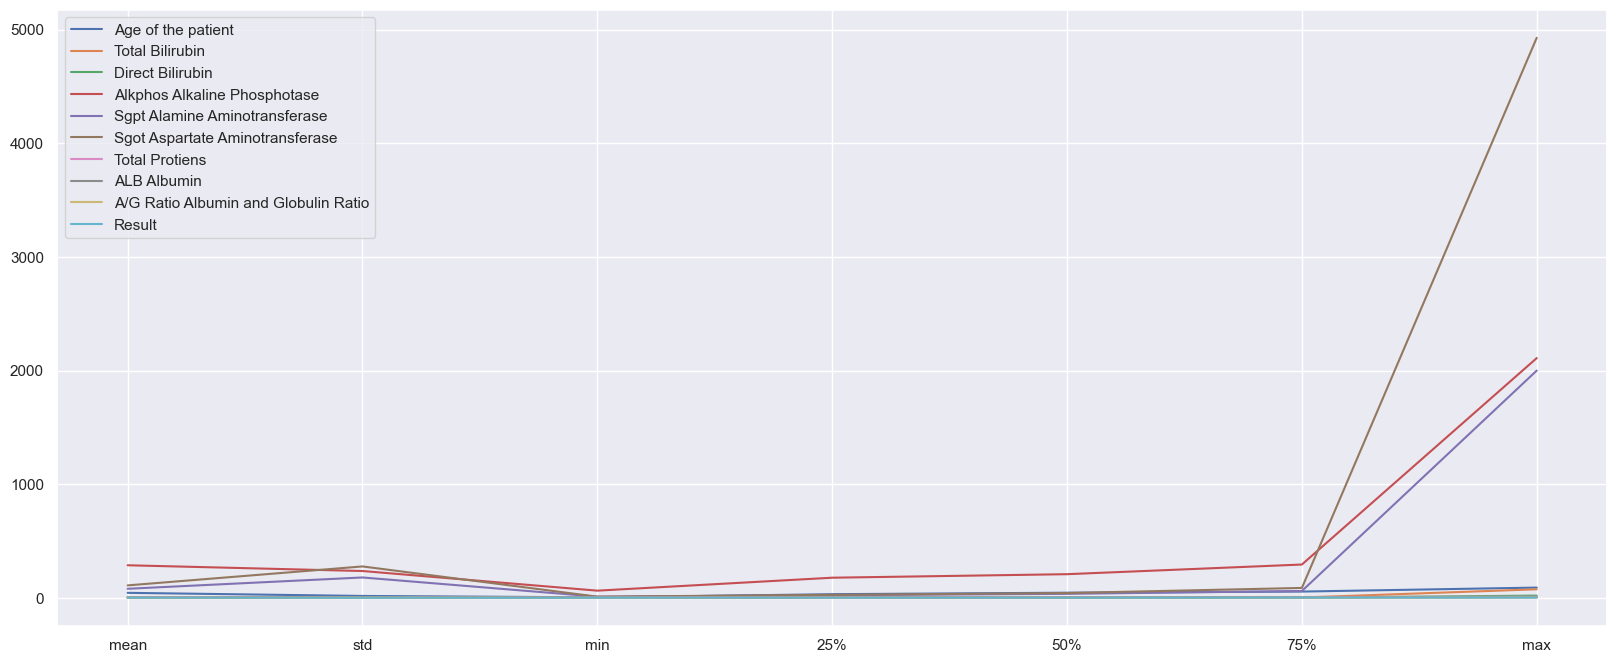

In [15]:
data.describe().drop('count',axis=0).plot(figsize=(20,8))
plt.show()

In [16]:
#Identifying Outliers in Numeric columns using IQR (Inter Quartile Range) and Q1 (25% Quantile), Q3(75% Quantile).

def identify_outliers(col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    return(col, q1, q3, iqr, lower_limit, upper_limit)

In [17]:
#Checking for Outliers and identifying them by calling identify_outliers() function.
#observations below Q1- 1.5*IQR, or those above Q3 + 1.5*IQR  are defined as outliers.

for col in num_columns :
    col, q1, q3, iqr, lower_limit, upper_limit = identify_outliers(col)
    print("\nColumn name : {}\n Q1 = {} \n Q3 = {}\n IQR = {}".format(col, q1, q3, iqr))
    print(" Lower limit = {}\n Upper limit = {}\n".format(lower_limit, upper_limit))
    outlier_count = len(data.loc[(data[col] < lower_limit) | (data[col] > upper_limit)])
    if outlier_count != 0 :
        print(outlier_count, "OUTLIERS ARE PRESENT in {} column.".format(col))
        print("Outlier datapoints in {} column are:".format(col))
        print(np.array(data.loc[(data[col] < lower_limit) | (data[col] > upper_limit)][col]))
    else:
        print("OUTLIERS ARE NOT PRESENT in {} column\n".format(col))


Column name : Age of the patient
 Q1 = 32.0 
 Q3 = 55.0
 IQR = 23.0
 Lower limit = -2.5
 Upper limit = 89.5

51 OUTLIERS ARE PRESENT in Age of the patient column.
Outlier datapoints in Age of the patient column are:
[90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.
 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90. 90.]

Column name : Total Bilirubin
 Q1 = 0.8 
 Q3 = 2.6
 IQR = 1.8
 Lower limit = -1.9000000000000001
 Upper limit = 5.300000000000001

2745 OUTLIERS ARE PRESENT in Total Bilirubin column.
Outlier datapoints in Total Bilirubin column are:
[10.9  7.3  6.2 ... 20.2 10.2  6.8]

Column name : Direct Bilirubin
 Q1 = 0.2 
 Q3 = 1.2
 IQR = 1.0
 Lower limit = -1.3
 Upper limit = 2.7

2744 OUTLIERS ARE PRESENT in Direct Bilirubin column.
Outlier datapoints in Direct Bilirubin column are:
[ 5.5  4.1  3.  ... 11.7  4.2  3. ]

Column name : Alkphos Alkaline Phosphotase
 Q1 = 177.0 
 Q


		Boxplot to check the presence of outliers in numeric columns



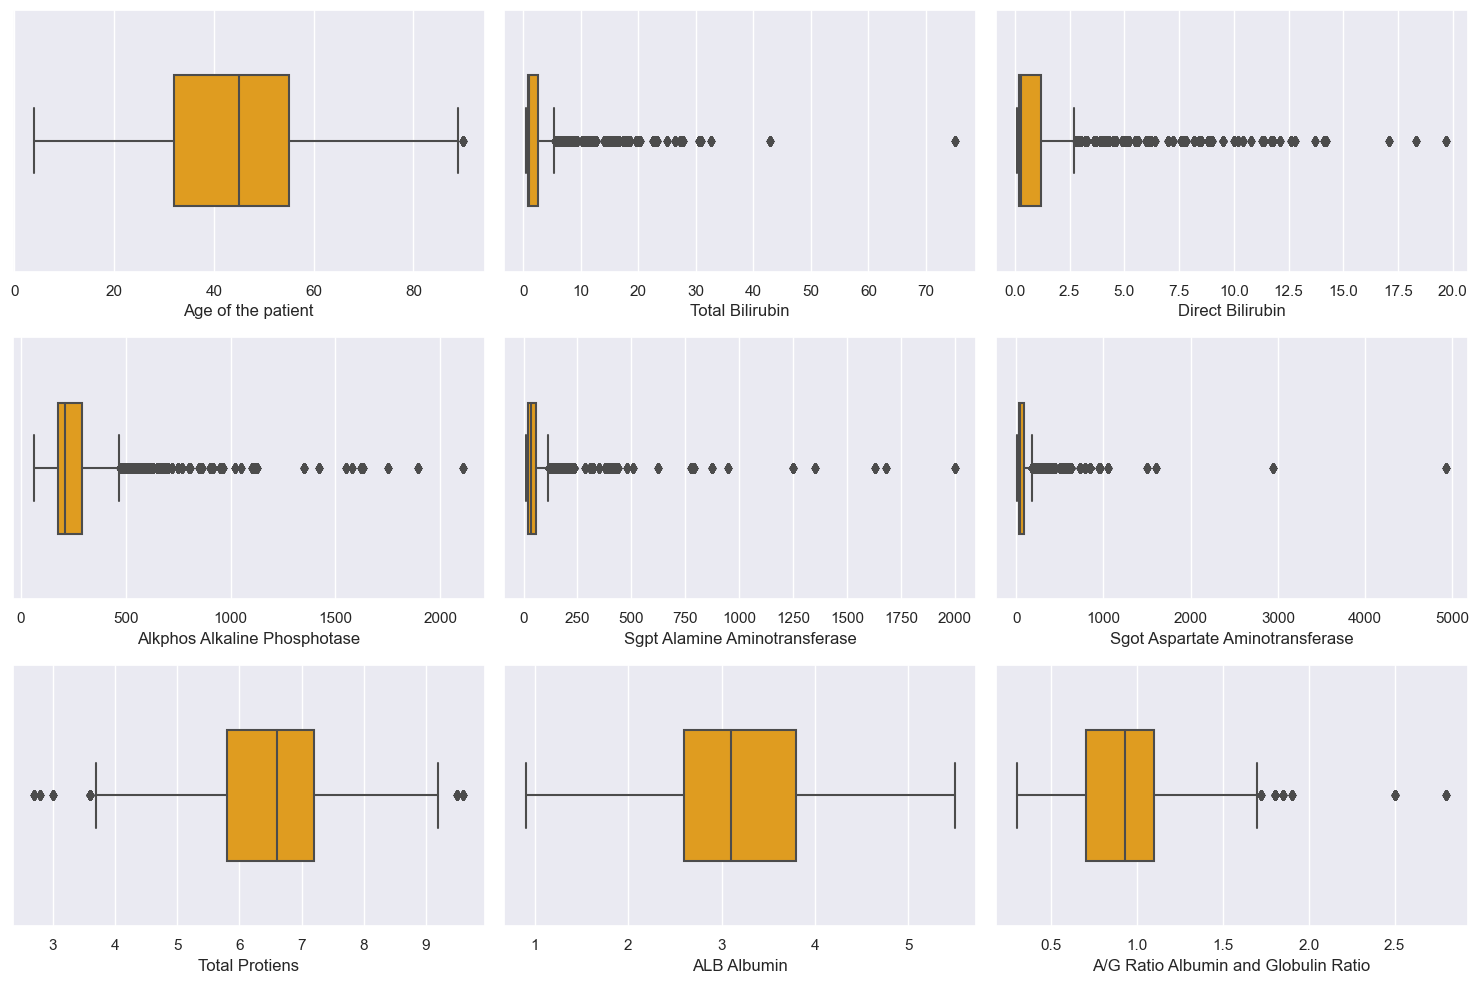

In [20]:
print('\n\t\tBoxplot to check the presence of outliers in numeric columns')
print('\t\t==============================================================\n')

# Plotting boxplots for numerical columns
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

for col, subplot in zip(numerical_columns, ax.flatten()):
    sns.boxplot(x=data[col], width=0.5, color='orange', ax=subplot)  # Changed data[[col]] to data[col]
    subplot.set_xlabel(col)

plt.tight_layout()
plt.show()


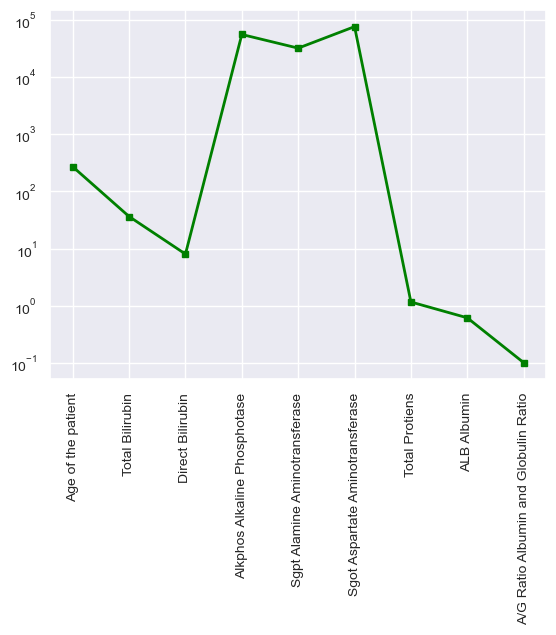

In [19]:
plt.xticks(rotation = 90, fontsize=10)
plt.yticks(fontsize=10)
plt.plot(data[num_columns].var(), color='green', marker='s',linewidth=2, markersize=5)
plt.yscale('log')
plt.show()

## Univariate Analysis

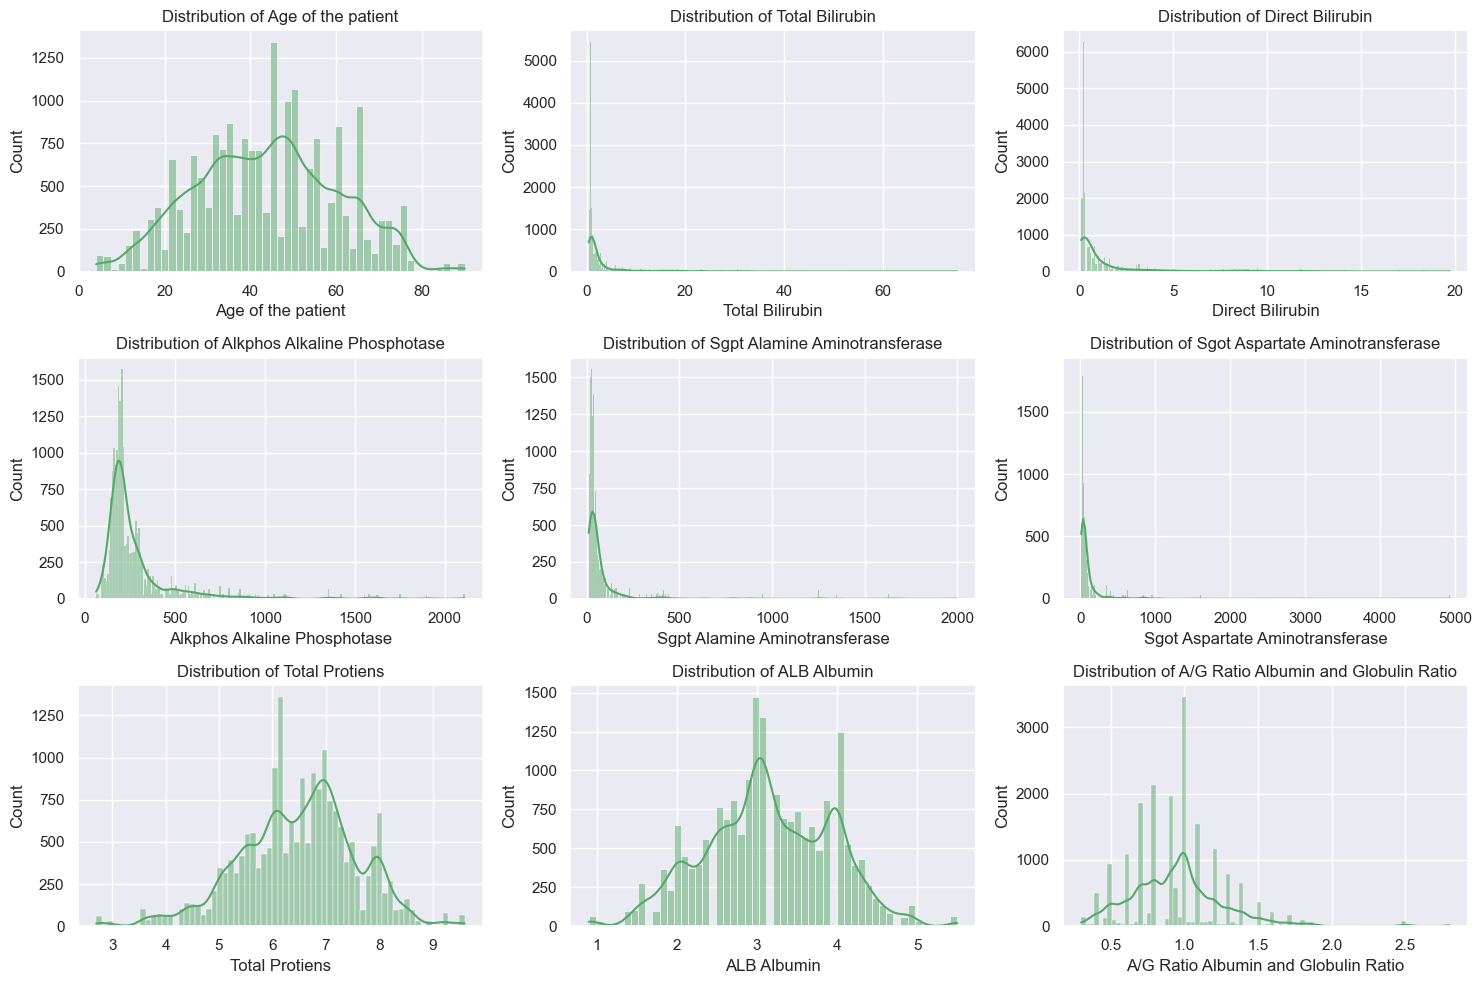

In [21]:
fig, ax = plt.subplots(3, 3, figsize=(15, 10))

# Loop through numerical columns and plot using histplot
for col, subplot in zip(numerical_columns, ax.flatten()):
    sns.histplot(data[col], ax=subplot, color='g', kde=True)
    subplot.set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()


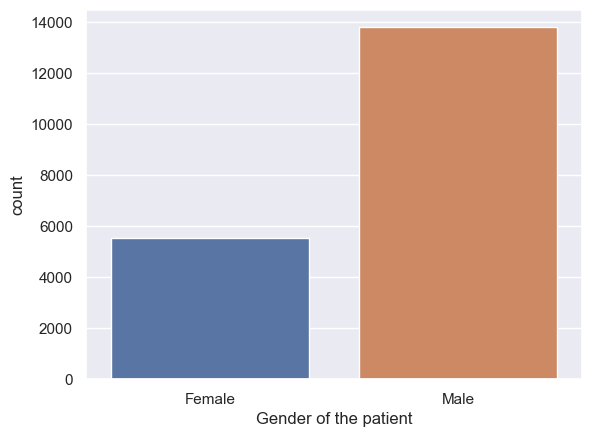

In [23]:
ax = sns.countplot(x='Gender of the patient', data=data)
plt.show()

In [26]:
data.groupby(by='Result').count()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
Result,,,,,,,,,,
1,13811,13811,13811,13811,13811,13811,13811,13811,13811,13811
2,5557,5557,5557,5557,5557,5557,5557,5557,5557,5557


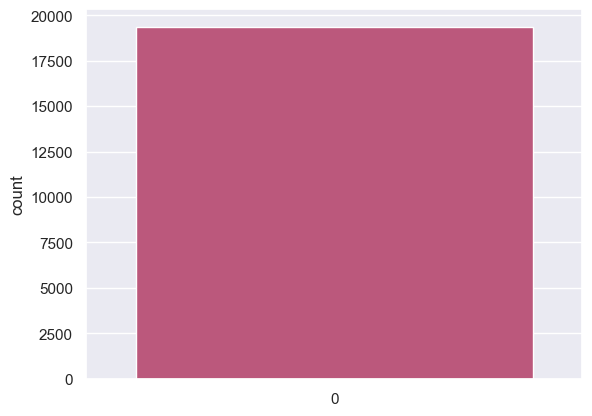

In [27]:
sns.countplot(data['Result'], palette = 'plasma')
plt.show()

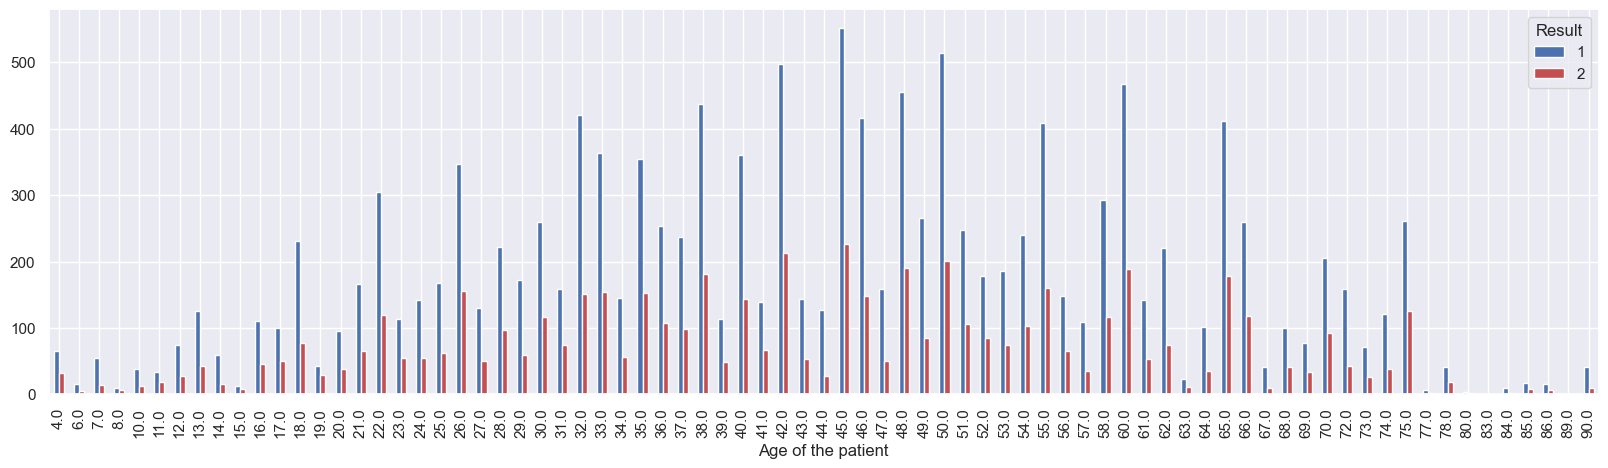

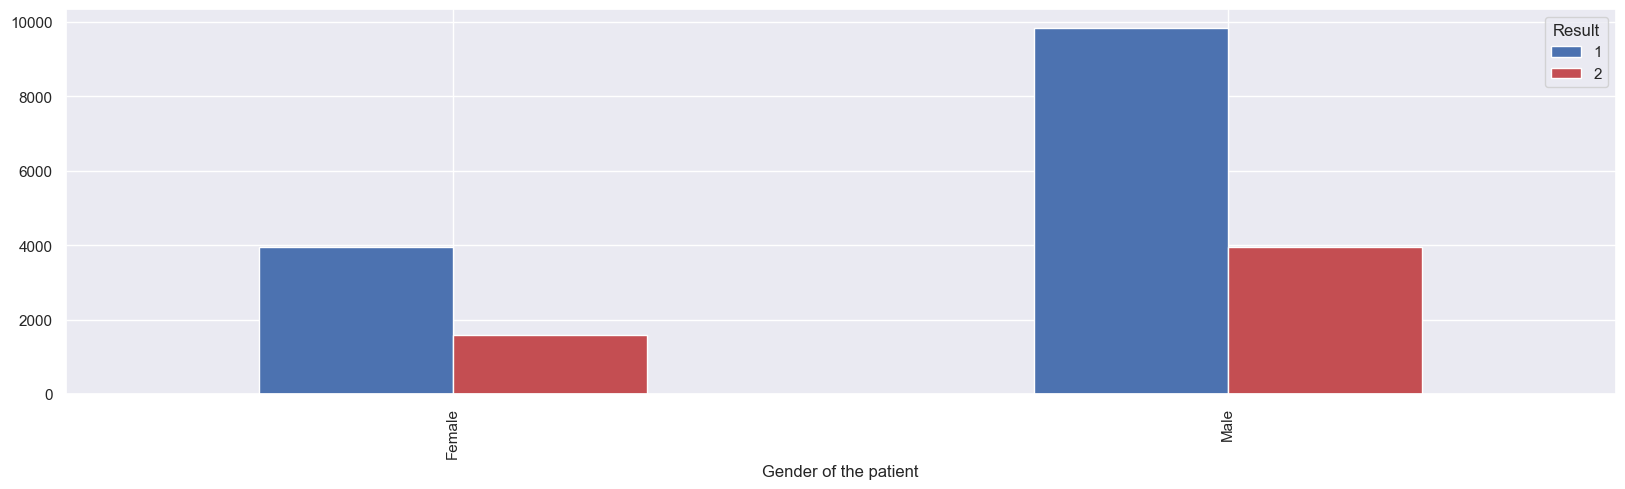

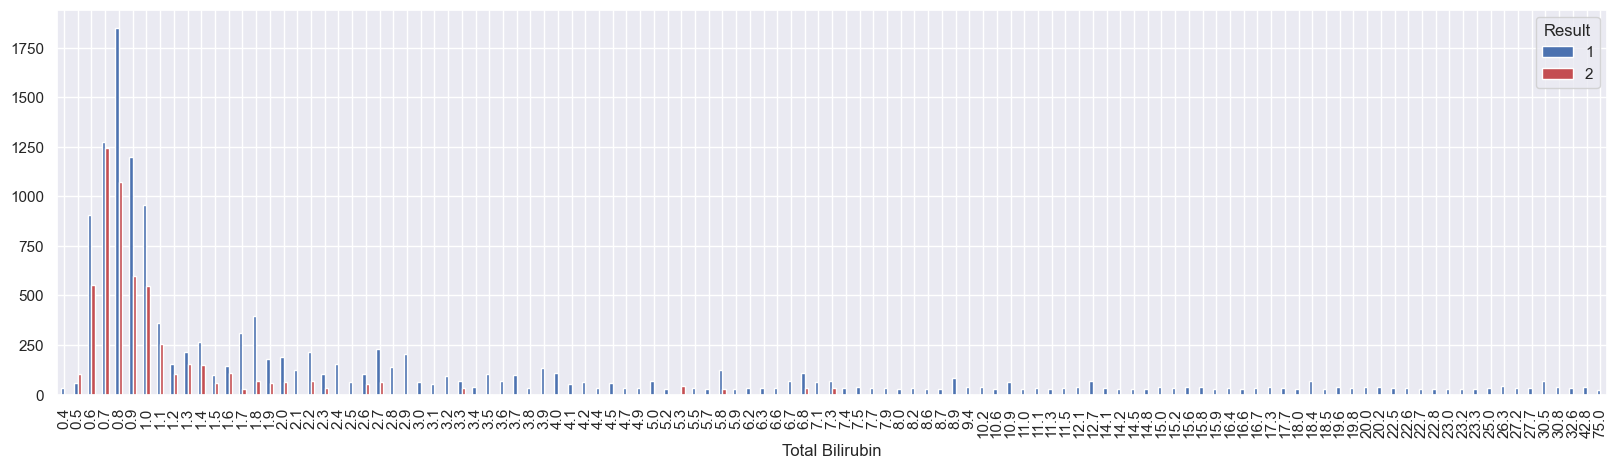

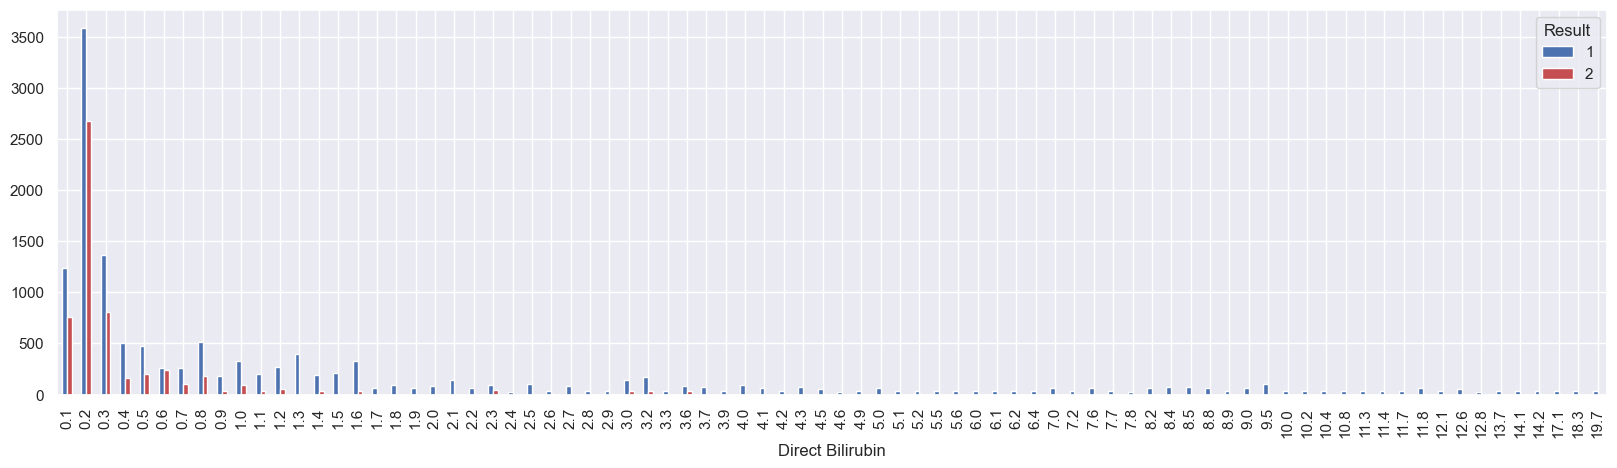

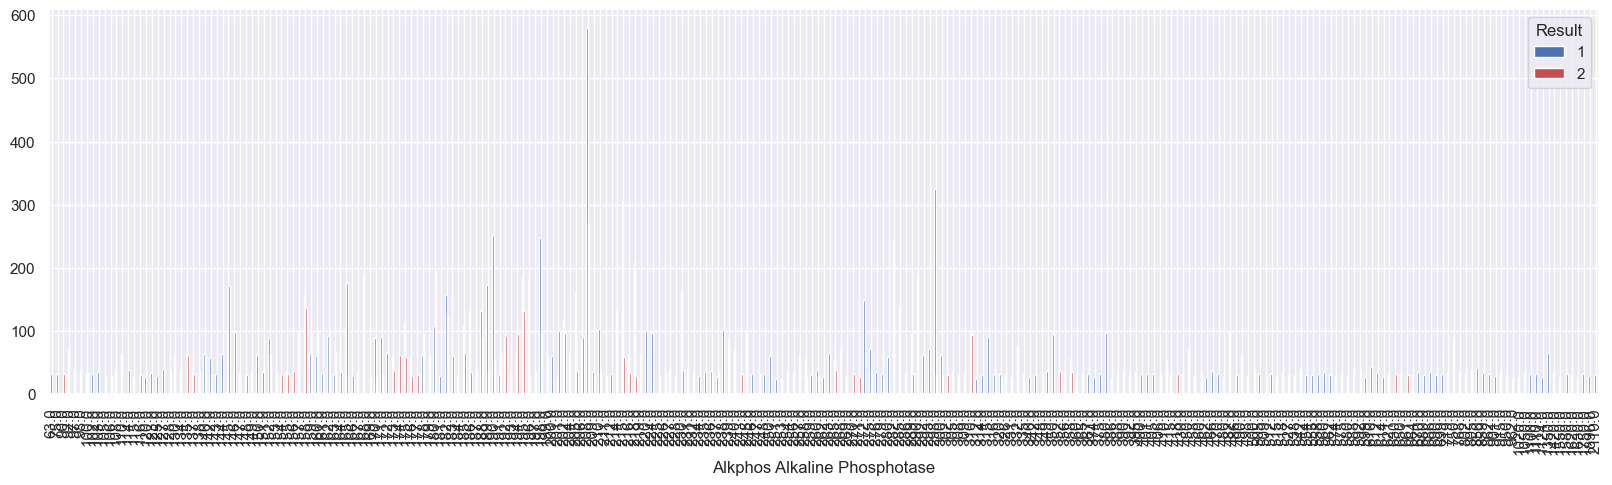

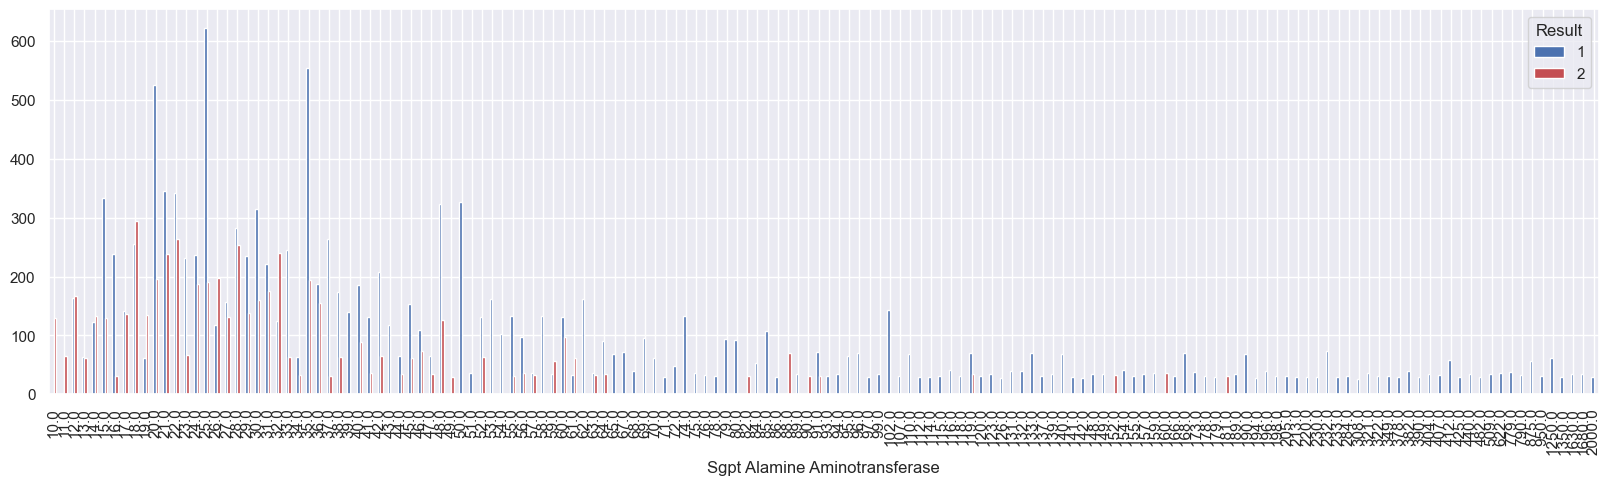

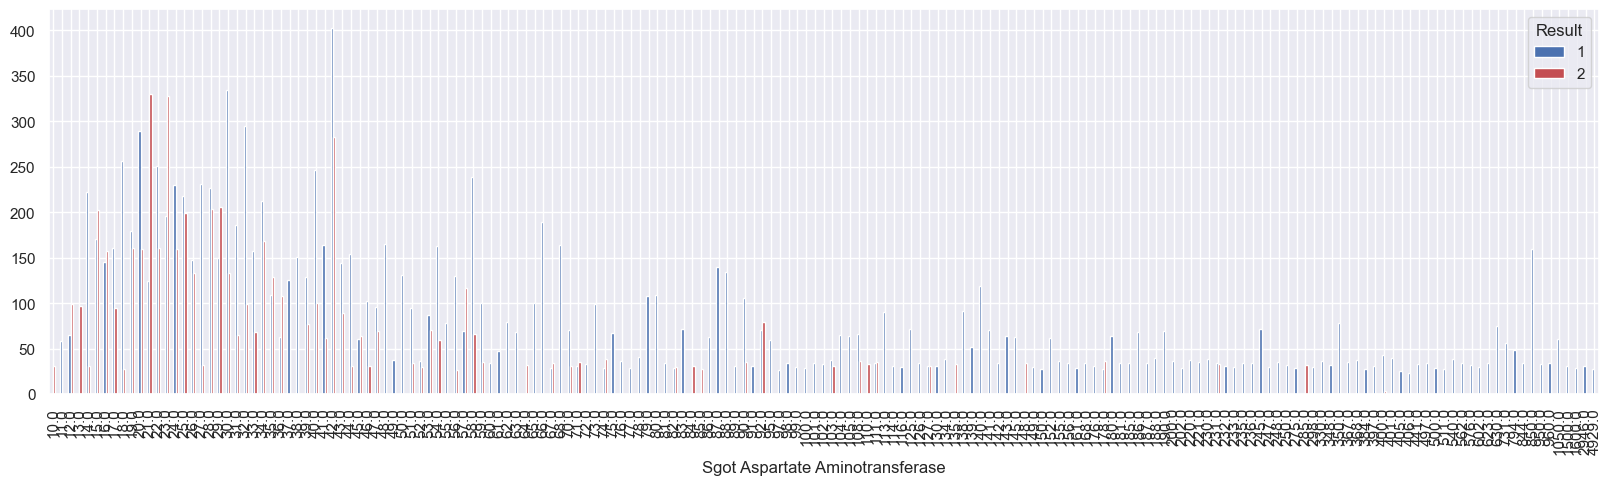

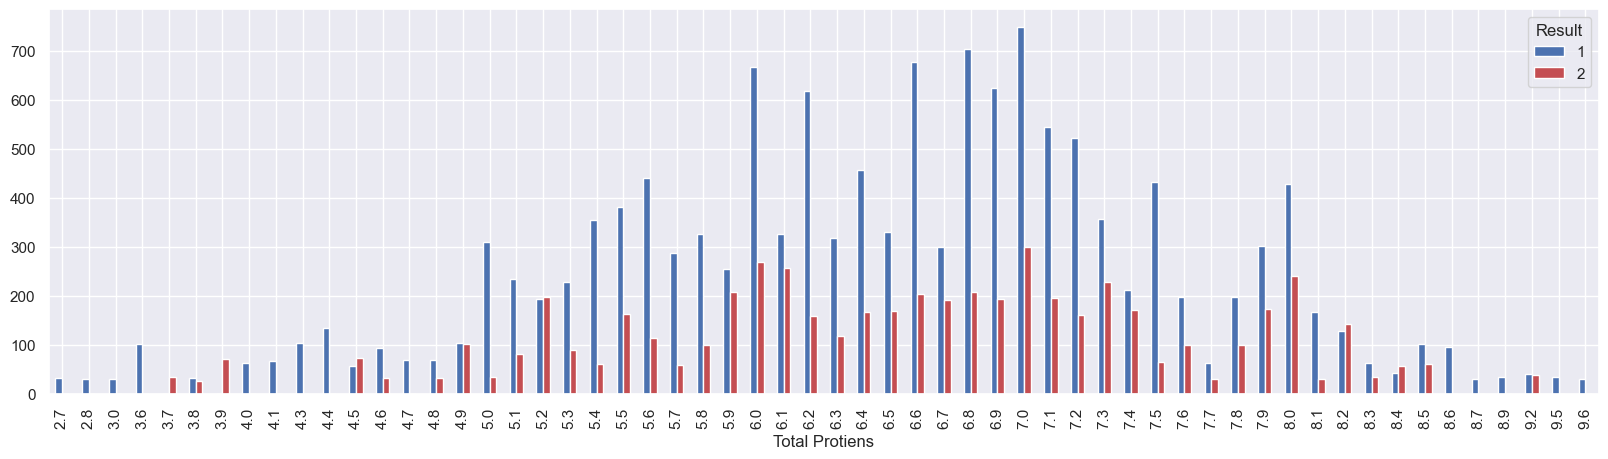

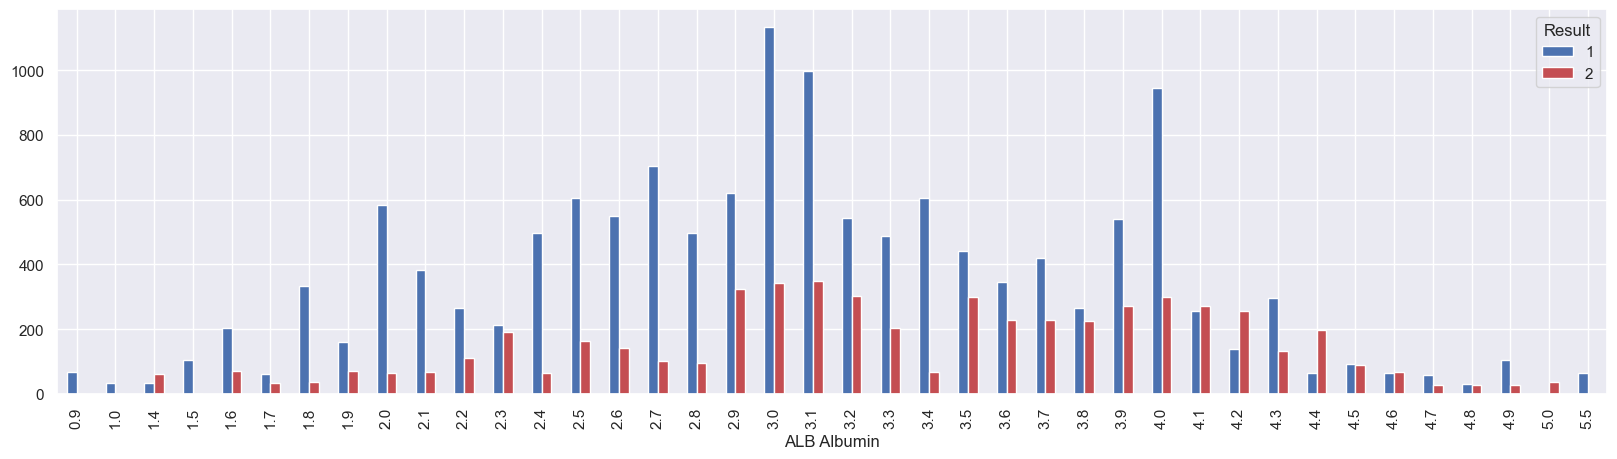

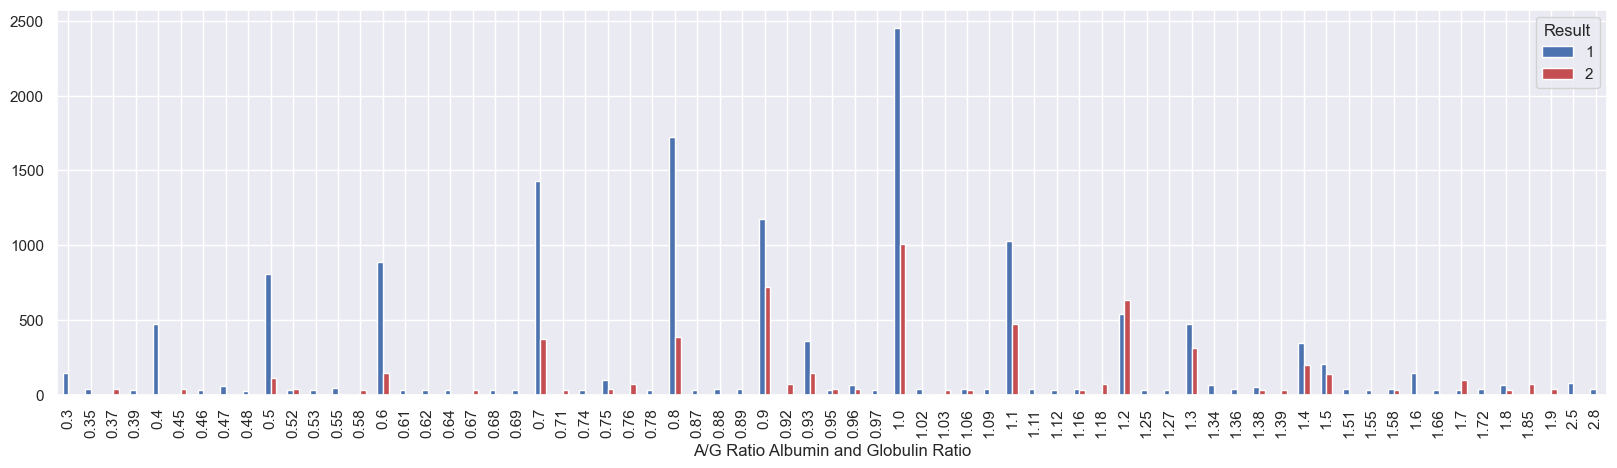

In [28]:
for col in data.drop('Result', axis=1).columns :
    pd.crosstab(data[col], data['Result']).plot(kind='bar',color=('b', 'r'), figsize=(20,5))

## Bivariate Analysis

C:\Users\ASUS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


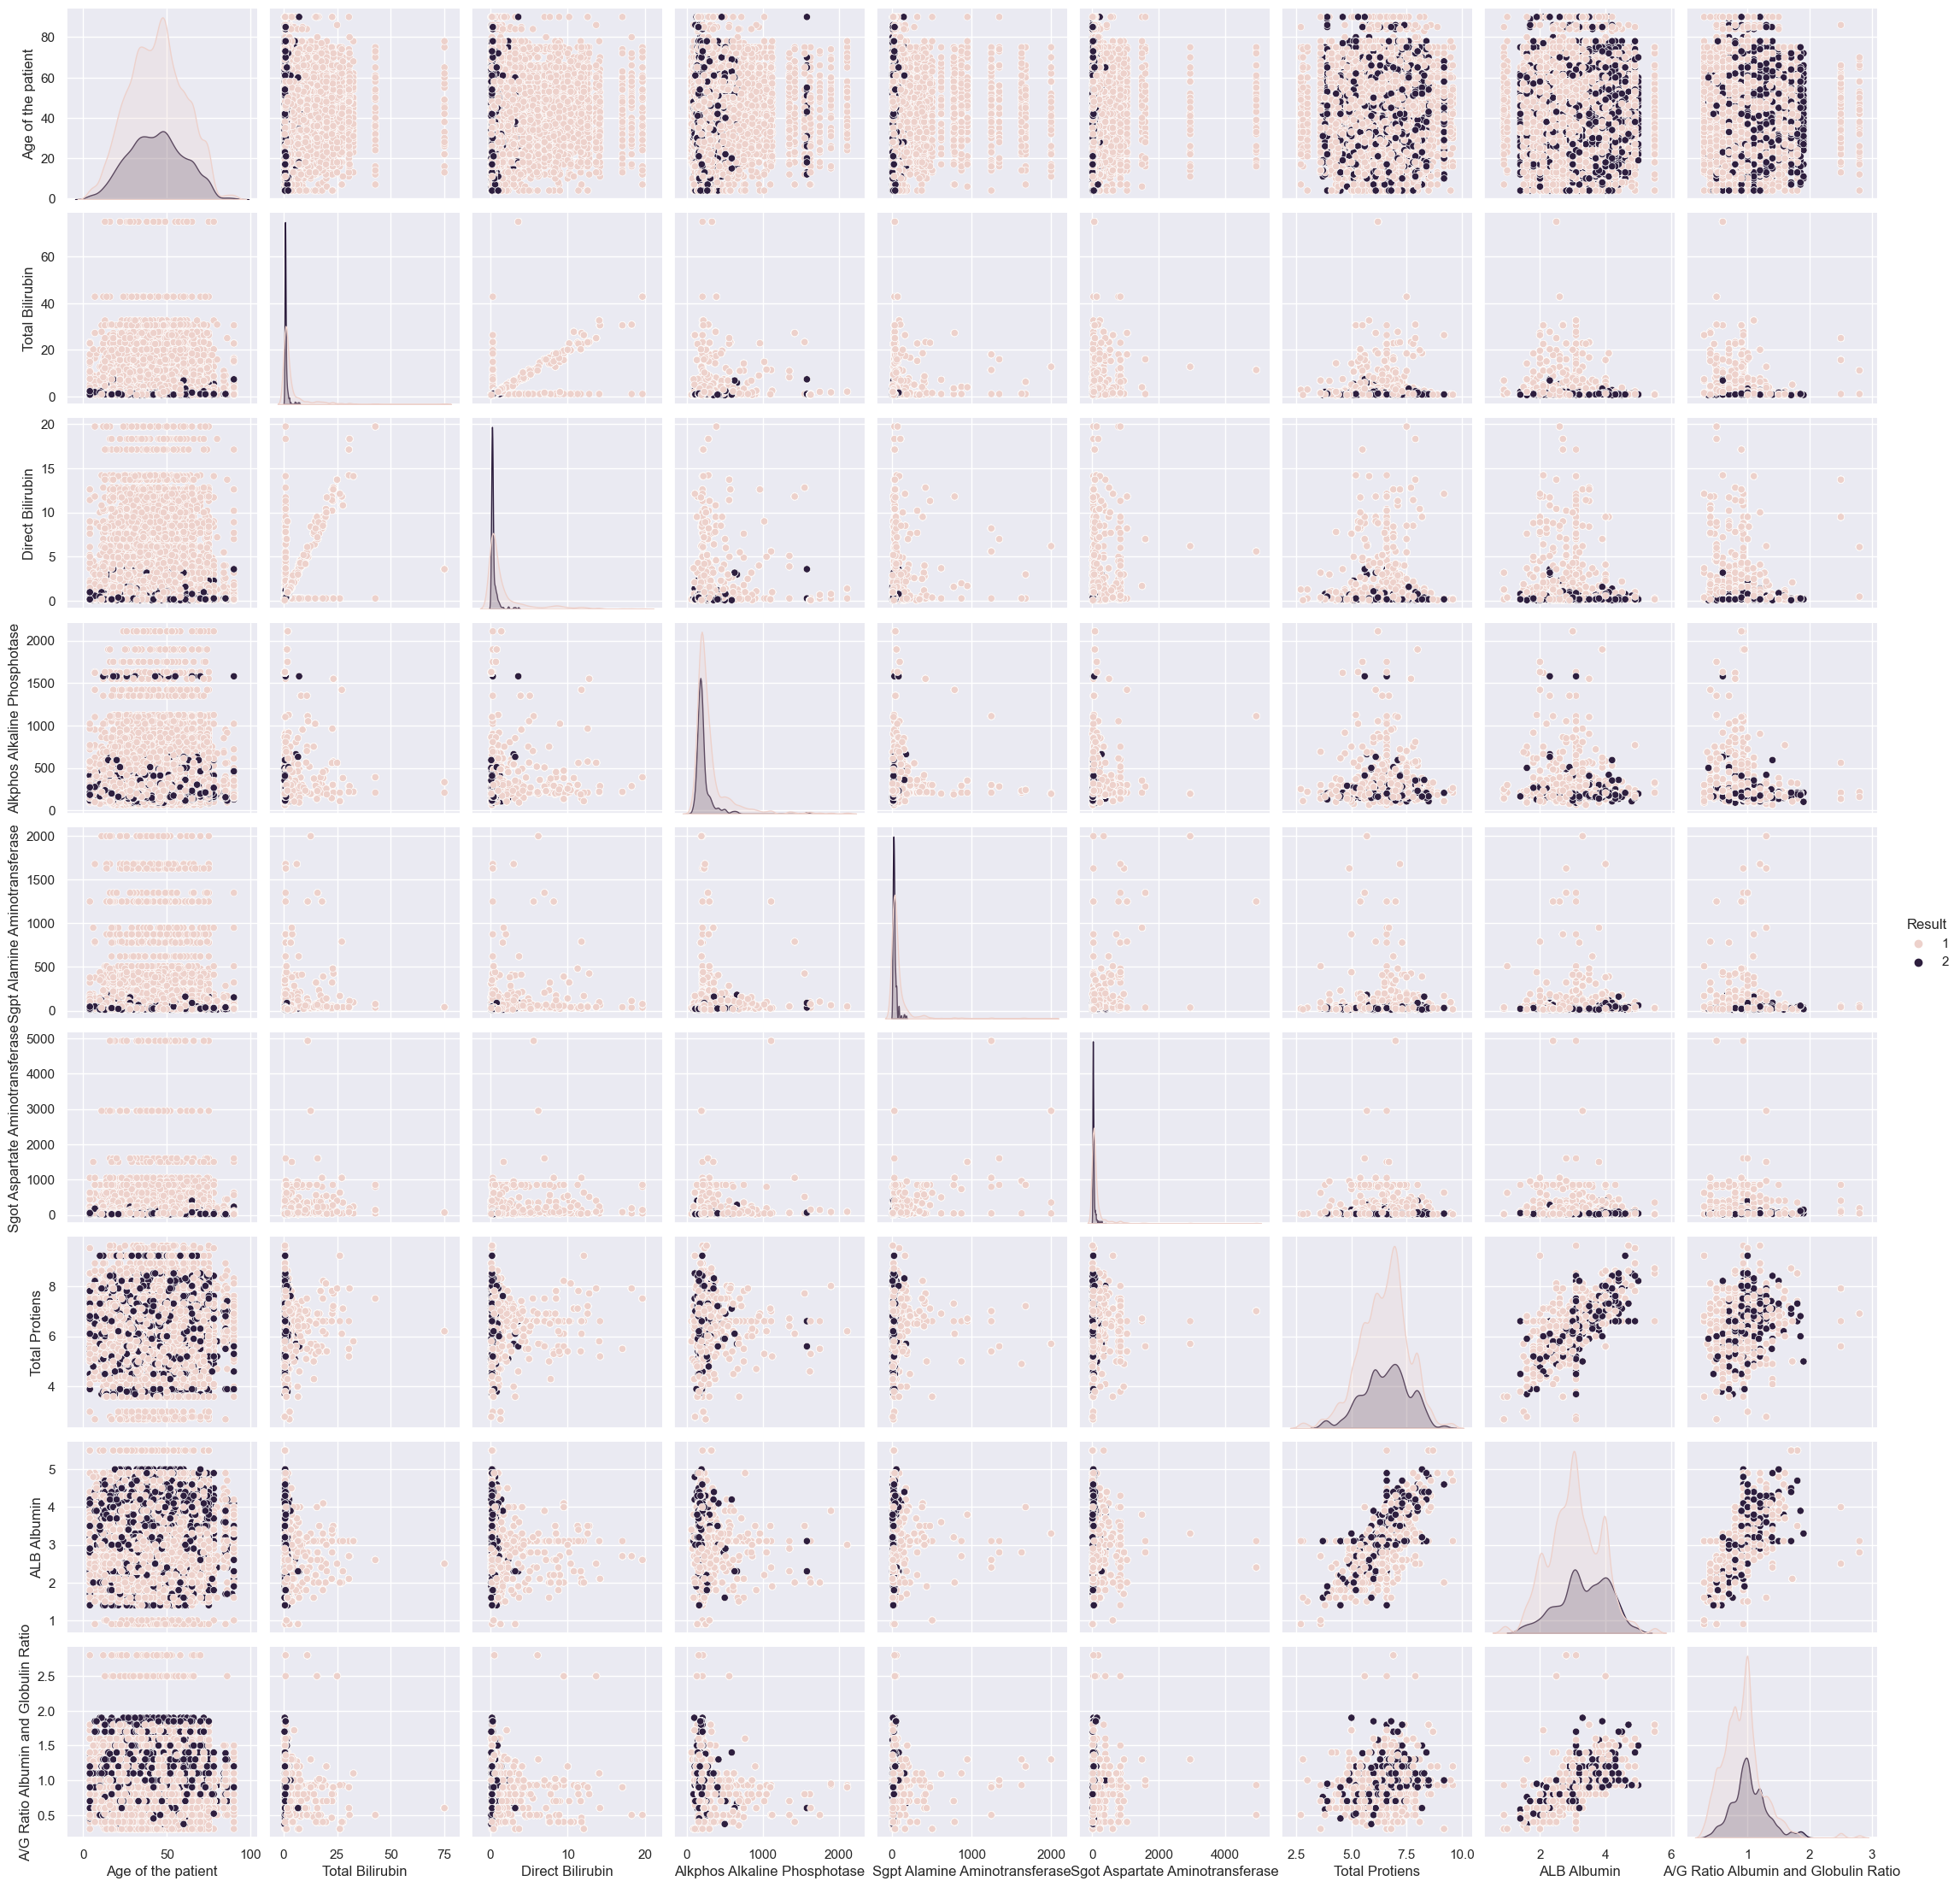

In [34]:
sns.pairplot(vars=data.drop(['Gender of the patient', 'Result'], axis=1).columns,hue='Result',data=data)
plt.show()

## Correlation between numerical columns

In [36]:
#Dropping categorical column and target for finding correlation
corr = data[num_columns].corr()
corr.style.background_gradient(cmap='YlGnBu')

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio
Age of the patient,1.000000,-0.003854,-0.004568,0.000868,0.005956,0.006246,-0.009365,-0.010387,-0.009535
Total Bilirubin,-0.003854,1.000000,0.884007,0.198085,0.205167,0.244579,-0.000669,-0.219384,-0.194955
Direct Bilirubin,-0.004568,0.884007,1.000000,0.216749,0.217222,0.255689,0.001673,-0.225039,-0.186220
Alkphos Alkaline Phosphotase,0.000868,0.198085,0.216749,1.000000,0.124814,0.158450,-0.023885,-0.159935,-0.226370
Sgpt Alamine Aminotransferase,0.005956,0.205167,0.217222,0.124814,1.000000,0.755545,-0.038683,-0.025867,-0.003727
Sgot Aspartate Aminotransferase,0.006246,0.244579,0.255689,0.158450,0.755545,1.000000,-0.025120,-0.083381,-0.066896
Total Protiens,-0.009365,-0.000669,0.001673,-0.023885,-0.038683,-0.025120,1.000000,0.766561,0.217217
ALB Albumin,-0.010387,-0.219384,-0.225039,-0.159935,-0.025867,-0.083381,0.766561,1.000000,0.668310
A/G Ratio Albumin and Globulin Ratio,-0.009535,-0.194955,-0.186220,-0.226370,-0.003727,-0.066896,0.217217,0.668310,1.000000


## Visualizing Correlation between numerical columns through Heat map

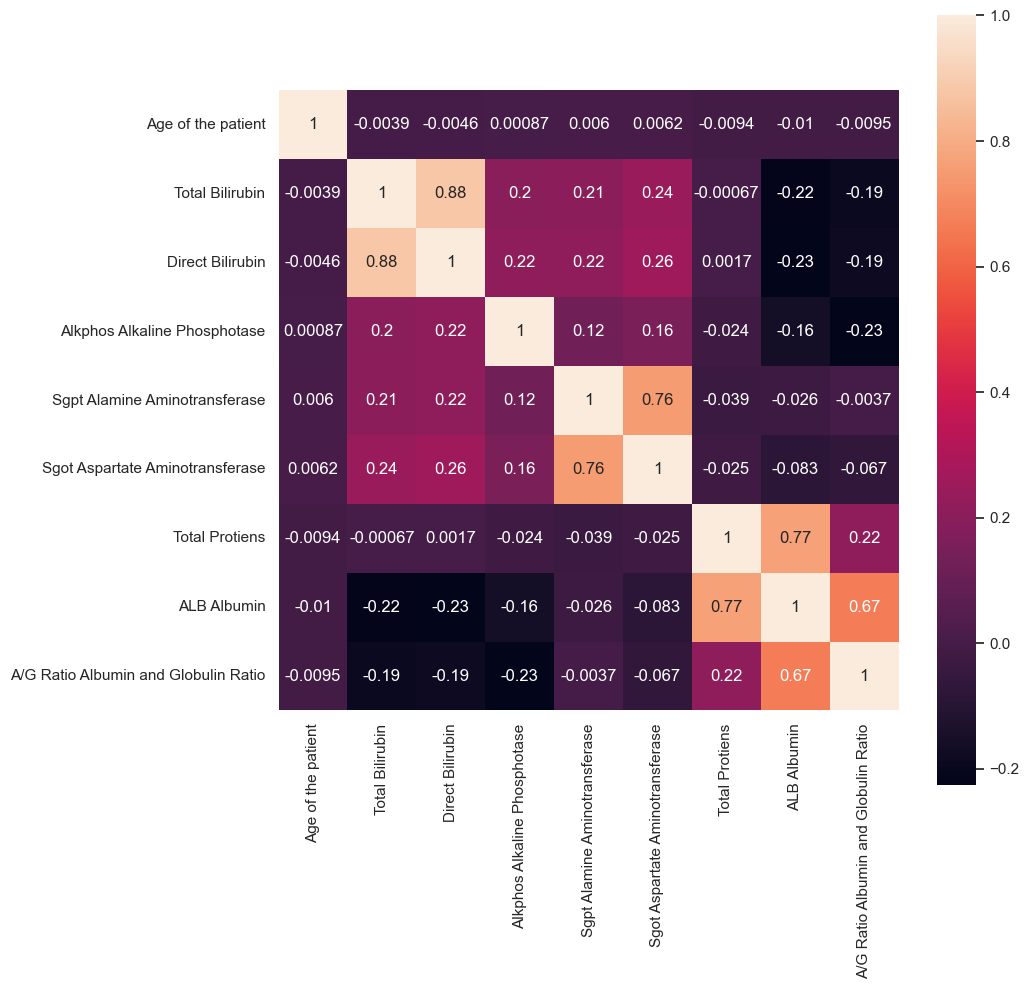

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, square=True)
plt.show()

In [38]:
# Contingency Table for 'Gender of the patient' and 'Result'
contingency_table = pd.crosstab(data['Gender of the patient'], data['Result'])
print("\nContingency Table:\n")
print(contingency_table)


Contingency Table:

Result                    1     2
Gender of the patient            
Female                 3960  1593
Male                   9851  3964


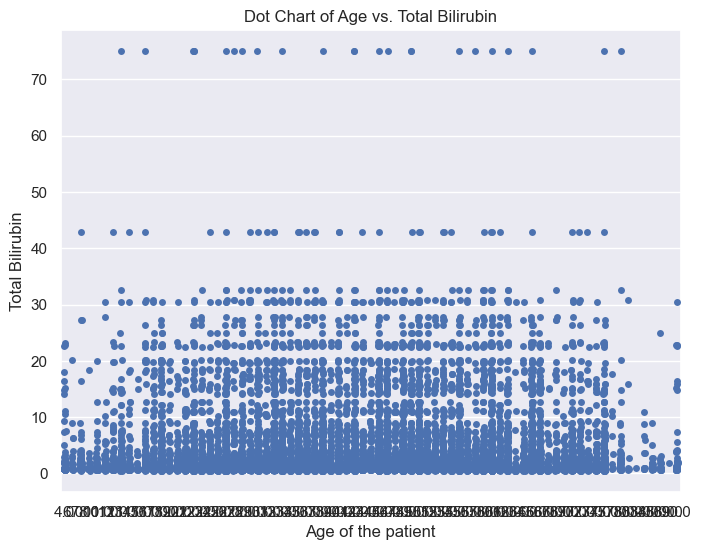

In [39]:
# Dot Chart for 'Age of the patient' vs. 'Total Bilirubin'
plt.figure(figsize=(8, 6))
sns.stripplot(x='Age of the patient', y='Total Bilirubin', data=data)
plt.title('Dot Chart of Age vs. Total Bilirubin')
plt.show()